### <p style="text-align: center;">Facultad de Matemática, Física, Astronomía y Computación</p>
### <p style="text-align: center;">Universidad Nacional de Córdoba</p>

#### <p style="text-align: center;">Curso de Posgrado</p>

#  <p style="text-align: center;">Diseño de Software para Cómputo Científico</p>

----

### <p style="text-align: center;">Presentación Trabajo Final</p>

## ReactorD: Diseño y Simulación de Reactores Químicos
---
**Alumnos:** 
 - Salvador Brandolin
 - Adrian Parodi
 - Maricel Santos

**Profesores:**
 - Juan Bautista Cabral
 - Federico Benelli

### Estructura de la presentación
---
- Introducción
- Modelos
  - Reactores Continuos Ideales
    - Reactor de Flujo Pistón
- Arquitectura e implementación del paquete
    - Desarrollo
    - Testing
    - Integración Continua
- Ejemplo de uso
- Conclusiones y perpectivas a futuro

### Introducción

La ingenierıa de las reacciones representa la base de la produccion de casi todos los productos quımicos industriales. 

El diseño de un reactor interrelaciona diversos fenómenos físicos y químicos:

-Transferencia de masa, calor y cantidad de movimiento.

-Cinéticas y mecánismos de reacción.

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 200;
           height: 300"
    src="python_fogler.png" 
    alt="Python-Fogler">
</img>


### Modelos

Ecuaciones principales: balance molar y balance de energía. 
Ambos se basan en el concepto de volumen de control, a través del cual se producen flujos de entrada y salida. 
Además, dentro del reactor se producen una o más reacciones químicas por lo que algunas sustancias se consumen, mientras que otras se generan.

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 30%;"
    src="balance.png" 
    alt="Balance">
</img>

<p style="text-align: center;">Entrada  -  Salida + Generacion  = Acumulación</p>

$$ F_{j0}  -  F_{j}  +  G_j  =   \frac{dN_j} {dt}  $$

#### Modelado de Reactores Continuos Ideales

**Masa**

$$ F_{j0}  -  F_{j}  + \int ^{V}  {r_j dV}  =   \frac{dN_j} {dt} $$

**Energía**

$$ \dot{Q}  -  \dot{W}_{s}  + \sum_{j=1}^n  F_{j0}H_{j0}- \sum_{j=1}^n  F_{j}H_{j}=   \frac{d\hat{E}_{sistema}} {dt} $$

#### Reactor Flujo Pistón (PFR)

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 30%;"
    src="PFR.png" 
    alt="PFR">
</img>

Por otro lado, de acuerdo a los requerimientos la operación de los reactores puede variar según:  

- Balance de Masa:
	- Homogeneo
    - Heterogeneo
    - Continuo
    - Discontinuo
- Balance de Energia:
	- Isotermico
    - No isotermico
    - Adiabatico
- Balance de Presión:
	- Isobarico
    - No isobarico


#### Operacion Continua Homogenea Isotermica Isobarica

$$ \frac{dF_{j}}{dV} = r_{j} $$

#### Operacion Continua Homogenea Adiabatica Isobarica

$$ \frac{dT}{dV} = \frac{\sum r_{ji}\\\Delta H_{Ri} }{\sum F_{j} {C_p}_j } $$

#### Operacion Continua Homogenea Isotermica No Isobarica

$$ \frac{dP}{dz} = - \frac{G}{{\rho}{g}{D_{p}}}(\frac{1-\phi}{\phi^3})[\frac{{150}({1-\phi})\mu}{D_{p}}+1.75{G}] $$

## Arquitectura e implementación

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 30%;"
    src="arquitectura.PNG" 
    alt="arquitectura">
</img>

Un reactor puede ser operado en variedad de condiciones lo que afecta el modelo matemático que lo describe. Además, ReactorD  permite encontrar soluciones para problemas de valor inicial y/o borde segun los datos iniciales que provea el usuario. 
Esto produce un problema con alto grado de acoplamiento. Por lo cual, se utilizó el patron "Strategy"  

Librerias utilizadas: 
- SciPy: ecuaciones algebraicas y diferenciales ordinarias
- py-pde: ecuaciones diferenciales parciales. 
- Thermo: constantes y correlaciones para propiedades de una amplia base de datos de sustancias. 

Input necesarios: 
- Reactantes, productos e inertes que participan de cada reaccion. 
- Cinetica de cada reaccion. (Constantes y orden)

El usuario tambien tiene la posibilidad de generar la sustancia con los datos y correlaciones correspondientes con la posibilidad de guardar estos objetos como archivos utilizando la herramienta pickle

### Testing

- Cantidad de test actualmente: 126

- Coverage alcanzado: 97%

- Principal estrategia: comparacion con ejemplos resueltos del libro 
"Elementos de ingenería de las reacciones químicas", Fogler 2008. para cada tipo de operacion y para diferentes condiciones iniciales y de borde.


### Integración Continua

- Repositorio disponible: https://github.com/SalvadorBrandolin/reactord
- Se aplican los tests mediante GitHub Actions en cada push. 
- Licencia: MIT

### Tutorial de uso

<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 50%;"
    src="isomeros_reaccion.png" 
    alt="arquitectura">
</img>

La reacción puede ser modelada como:

$$A \rightarrow B$$

Se considera que:
- La reacción se lleva a cabo en fase líquida en un ractor de flujo pistón 
a 298.15 K y 101325 Pa.

- El reactivo A ingresa puro al reactor con un flujo molar de 5mol/h.  

- La ley de velocidad de la reacción:

$$r_{A} = k C_{A}$$

con $k$ = $0.00001 s^{−1}$  
Siendo $C_{A}$ la concentración de cis-2-buteno en $\frac{mol}{m³}$

- El volumen del reactor es de 99 litros.
- La mezcla reactiva puede modelarse como una solución ideal.

In [1]:
import matplotlib.pyplot as plt
import reactord as rd

__Búsqueda de las sustancias en la base de datos__

In [2]:
A = rd.Substance.from_thermo_database("cis-2-butene")
B = rd.Substance.from_thermo_database("trans-2-butene")

__Se selecciona a IdealSolution para modelar la mezcla reactiva__

In [3]:
mixture = rd.mix.IdealSolution(A=A, B=B)

__Definición de la ley cinética y datos del reactor__

In [4]:
def kinetic_law(concentrations, temperature):
    k = 0.00001
    return k * concentrations[0]


fa_in = 5 / 3600  # mol/s
reactor_volume = 99 * 0.001  # m3

__Instanciamos el reactor PFR__

In [5]:
pfr = rd.idealreactor.StationaryPFR.from_isothermic_isobaric(
    mix=mixture,
    list_of_reactions=[kinetic_law],
    stoichiometry=[-1, 1],
    kinetic_argument="concentration",
    reactor_dim_minmax=[0, reactor_volume],
    transversal_area=1,
    isothermic_temperature=298.15,
    isobaric_pressure=101325,
    molar_flow_in={"cis-2-butene": fa_in, "trans-2-butene": 0},
)

__Simulación del reactor__

In [6]:
solution = pfr.simulate(
    grid_size=100,
    tol=1e-4,
    max_nodes=1000,
    verbose=0,
)

__Análisis de resultados__

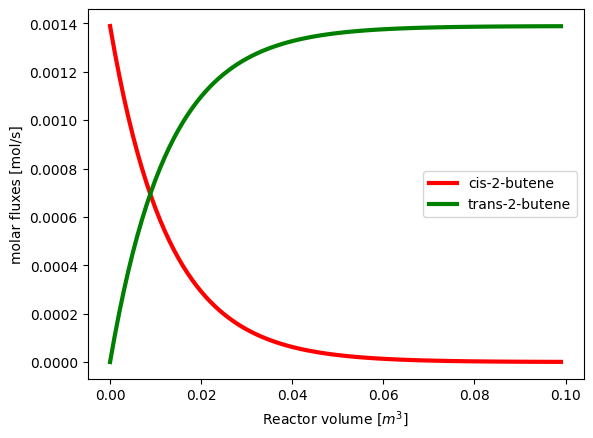

In [7]:
reactor_length = solution.x
dependent_variables = solution.y

# PLoting
fig1, ax1 = plt.subplots(1)
ax1.plot(
    reactor_length,
    dependent_variables[0],
    "-r",
    label="cis-2-butene",
    linewidth=3,
)
ax1.plot(
    reactor_length,
    dependent_variables[1],
    "-g",
    label="trans-2-butene",
    linewidth=3,
)
ax1.set_xlabel(r"Reactor volume [$m^{3}$]", fontsize=10)
ax1.set_ylabel("molar fluxes [mol/s]", fontsize=10)

ax1.legend()
plt.show()

__Operaciones admitidas__

```python
rd.idealreactor.StationaryPFR.from_isothermic_isobaric()
rd.idealreactor.StationaryPFR.from_isothermic_noisobaric()
rd.idealreactor.StationaryPFR.from_adiabatic_isobaric()
rd.idealreactor.StationaryPFR.from_adiabatic_noisobaric()
```

### Perspectivas a Futuro

- Ampliar el tipo de operaciones para PFR
- Agregar reactor tipo mezcla perfecta
- Ampliar resolucion de reactores heterogeneos

#  <p style="text-align: center;">¡Gracias por la atención!</p>

###  <p style="text-align: center;">¿Preguntas?</p>